In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from datetime import timedelta
import geopandas as gpd

In [17]:
path = 'data/kaari2132023.csv'

df = pd.read_csv(path)
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,pair_id,curve_id,filtered,blrmvd
0,2023-03-21 00:00:00,b'0ams',1,64.532524,19.349890,7.319108,6.757187,-93.695259,66.141273,64.409019,16.322577,b'GLONASS ',1.068718,6.848495,GLONASS 0ams1,0,7.432506,-0.584011
1,2023-03-21 00:00:30,b'0ams',1,64.532524,19.349890,7.559455,7.005074,-93.473663,66.691986,64.417694,16.399038,b'GLONASS ',1.064910,7.098679,GLONASS 0ams1,0,7.460094,-0.361414
2,2023-03-21 00:01:30,b'0ams',1,64.532524,19.349890,7.706900,7.154760,-93.358940,66.967659,64.422279,16.442909,b'GLONASS ',1.063058,7.249745,GLONASS 0ams1,0,7.488637,-0.238892
3,2023-03-21 00:02:00,b'0ams',1,64.532524,19.349890,7.740303,7.198741,-93.241463,67.243530,64.426292,16.475420,b'GLONASS ',1.061240,7.293639,GLONASS 0ams1,0,7.516915,-0.223276
4,2023-03-21 00:02:30,b'0ams',1,64.532524,19.349890,7.669321,7.158023,-92.997871,67.795799,64.434814,16.551697,b'GLONASS ',1.057707,7.250894,GLONASS 0ams1,0,7.545177,-0.294283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085267,2023-03-21 23:57:00,b'ylit',9,66.306602,23.667742,9.515786,7.572054,-132.467819,50.392902,64.604004,19.501953,b'GPS ',1.250118,7.611908,GPS ylit9,2,7.728938,-0.117029
8085268,2023-03-21 23:57:30,b'ylit',9,66.306602,23.667742,9.618620,7.675449,-132.512192,50.624043,64.611526,19.524801,b'GPS ',1.246285,7.717836,GPS ylit9,2,7.732732,-0.014896
8085269,2023-03-21 23:58:00,b'ylit',9,66.306602,23.667742,9.746588,7.821429,-132.609863,51.090988,64.638084,19.597088,b'GPS ',1.238659,7.868658,GPS ylit9,2,7.736907,0.131751
8085270,2023-03-21 23:59:00,b'ylit',9,66.306602,23.667742,9.640309,7.757446,-132.659317,51.321877,64.656937,19.645588,b'GPS ',1.234948,7.806247,GPS ylit9,2,7.741059,0.065188


## Delete the first and last 15 mins of each curve

In [18]:

def trim_curve(group):
    group = group.sort_values('datetime')
    start_time = group['datetime'].iloc[0] + timedelta(minutes=15)
    end_time = group['datetime'].iloc[-1] - timedelta(minutes=15)
    return group[(group['datetime'] >= start_time) & (group['datetime'] <= end_time)]

# Apply the function to each group defined by the reference station-satellite pair index and curve index
df = df.groupby(['pair_id', 'curve_id']).apply(trim_curve).reset_index(drop=True)


## Bin values into a grid

In [27]:
DATETIME = '2023-03-21 12:00:00'

specific_datetime = pd.to_datetime(DATETIME)

df1 = df.copy()

df1 = df1.loc[df1['datetime'] == specific_datetime]

resolution = 0.5

# Discretize latitude and longitude into bins
df1['gdlat_bin'] = pd.cut(df1['gdlat'], bins=np.arange(0, 91, resolution), labels=False)
df1['glon_bin'] = pd.cut(df1['glon'], bins=np.arange(0, 361, resolution), labels=False)

# Create pivot table with binned values
pivot_table = df1.pivot_table(index='gdlat_bin', columns='glon_bin', values='blrmvd', aggfunc='mean')

In [34]:
pivot_table

glon_bin,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,106.0
gdlat_bin,,,,,,,,,,,,,,,,,,,,,
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Map all piercepoints

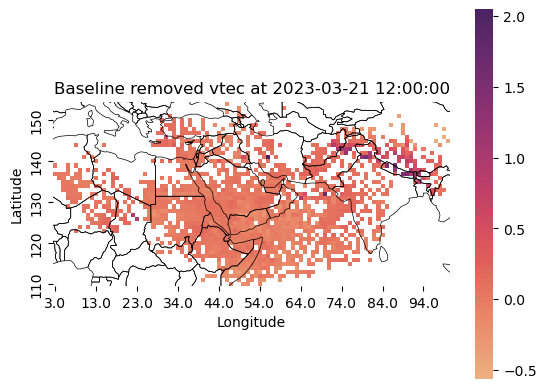

In [33]:
europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

europe.boundary.plot(edgecolor='black', linewidth=0.5)

sns.heatmap(pivot_table, cmap='flare', xticklabels=10, yticklabels=10)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Baseline removed vtec at {DATETIME}')

plt.gca().invert_yaxis()
plt.show()

In [ ]:
LONG = 25

df2 = df.loc[df['glon'] == LONG]

pivot = df.pivot(index='gdlat', columns='datetime', values='blrmvd')
sns.heatmap(pivot, cmap='viridis', vmin=-4, vmax=4)

plt.gca().invert_yaxis()
plt.xlabel('Datetime')
plt.ylabel('Latitude')
plt.title(f'TEC Heatmap for longitude {LONG}')

plt.show()

c:\Users\virtanem\Anaconda3\envs\gradu\lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 835981762 is out of bounds for axis 0 with size 835979968

In [ ]:
def create_fig(datetime, df):
    plt.figure(figsize=(8, 6))
    dff = df.loc[df['datetime'] == datetime]
    pivot = dff.pivot('gdlat', 'glon', 'blrmvd')

    sns.heatmap(pivot, cmap='viridis',vmin=-4, vmax=4)
    #plt.axvline(x=20.53, color='black', lw=3)
    plt.gca().invert_yaxis()

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Baseline removed TEC Heatmap at {datetime}')
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close()

    heatmap_array = np.array(Image.open(buf))
    return heatmap_array

def update(frame):
    heatmap = create_fig(frame, df)
    plt.clf()
    plt.imshow(heatmap)

In [ ]:
frames = sorted(df['datetime'].unique())
fig, ax = plt.subplots()

# Create the animation using ArtistAnimation
animation = FuncAnimation(fig, update, frames=frames, interval=100)

# Save the animation as a GIF file
#animation.save('heatmap_animation.gif', writer='imagemagick')

# Save the animation as an MP4 file (requires ffmpeg or avconv installed)
animation.save('animations/heatmap_animation_sg.mp4', writer='ffmpeg')